               Revenue            COGS           OPEX   Depreciation  \
Year 1 284,312,000,000 170,587,200,000 28,431,200,000 22,703,000,000   
Year 2 298,527,600,000 179,116,560,000 29,852,760,000 22,703,000,000   
Year 3 313,453,980,000 188,072,388,000 31,345,398,000 22,703,000,000   
Year 4 329,126,679,000 197,476,007,400 32,912,667,900 22,703,000,000   
Year 5 345,583,012,950 207,349,807,770 34,558,301,295 22,703,000,000   

                 EBIT            Tax     Net Income  CapEx  Change in WC  \
Year 1 62,590,600,000 13,144,026,000 49,446,574,000      0             0   
Year 2 66,855,280,000 14,039,608,800 52,815,671,200      0             0   
Year 3 71,333,194,000 14,979,970,740 56,353,223,260      0             0   
Year 4 76,035,003,700 15,967,350,777 60,067,652,923      0             0   
Year 5 80,971,903,885 17,004,099,816 63,967,804,069      0             0   

        Operating Cash Flow  Free Cash Flow            Cash             PPE  \
Year 1       72,149,574,000  72

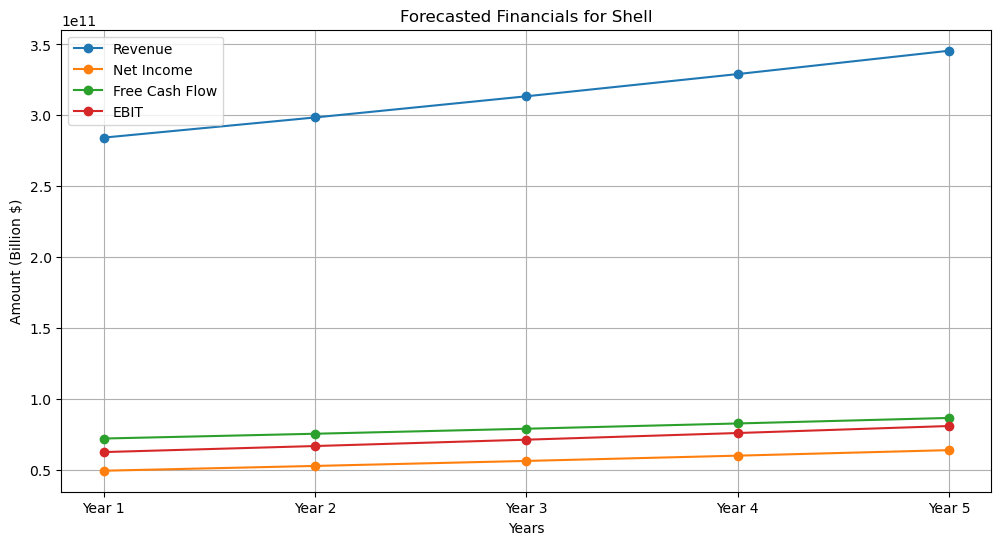

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

ticker = yf.Ticker("SHEL")

# Get historical financial statements
income_stmt = ticker.financials.T  # Income Statement
balance_sheet = ticker.balance_sheet.T
cash_flow_stmt = ticker.cashflow.T

# Take most recent year’s data
latest_is = income_stmt.iloc[0]
latest_bs = balance_sheet.iloc[0]
latest_cf = cash_flow_stmt.iloc[0]

# Base year values
revenue_base = latest_is.get("Total Revenue", 0)
cogs_base = latest_is.get("Cost Of Revenue", 0)
opex_base = latest_is.get("Selling General Administrative", 0)
tax_rate = 0.21  # Estimate or extract from IS
capex_base = -latest_cf.get("Capital Expenditures", 0)
depreciation_base = latest_cf.get("Depreciation", 0)
change_wc_base = latest_cf.get("Change To Working Capital", 0)
cash_base = latest_bs.get("Cash", 0)
ppe_base = latest_bs.get("Property Plant Equipment", 0)
debt_base = latest_bs.get("Long Term Debt", 0)
equity_base = latest_bs.get("Ordinary Shares Number", 0) 

years = [f"Year {i+1}" for i in range(5)]
revenue_growth = 0.05

forecast = pd.DataFrame(index=years)

# Income Statement
forecast["Revenue"] = [revenue_base * (1 + revenue_growth)**i for i in range(5)]
forecast["COGS"] = forecast["Revenue"] * 0.6 
forecast["OPEX"] = forecast["Revenue"] * 0.1 
forecast["Depreciation"] = depreciation_base
forecast["EBIT"] = forecast["Revenue"] - forecast["COGS"] - forecast["OPEX"] - forecast["Depreciation"]
forecast["Tax"] = forecast["EBIT"] * tax_rate
forecast["Net Income"] = forecast["EBIT"] - forecast["Tax"]

# Cash Flow Statement
forecast["CapEx"] = capex_base
forecast["Change in WC"] = change_wc_base 
forecast["Operating Cash Flow"] = forecast["Net Income"] + forecast["Depreciation"]
forecast["Free Cash Flow"] = forecast["Operating Cash Flow"] - forecast["CapEx"] - forecast["Change in WC"]

# Balance Sheet (simplified)
forecast["Cash"] = cash_base + forecast["Free Cash Flow"].cumsum()
forecast["PPE"] = ppe_base - forecast["CapEx"].cumsum() + forecast["Depreciation"].cumsum()
forecast["Debt"] = debt_base  # Assume no change
forecast["Equity"] = equity_base + forecast["Net Income"].cumsum()
forecast["Assets"] = forecast["Cash"] + forecast["PPE"]
forecast["Liabilities + Equity"] = forecast["Debt"] + forecast["Equity"]

pd.set_option("display.float_format", "{:,.0f}".format)
print(forecast)

#Now to plot the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast.index, forecast["Revenue"], label="Revenue", marker='o')
plt.plot(forecast.index, forecast["Net Income"], label="Net Income", marker='o')
plt.plot(forecast.index, forecast["Free Cash Flow"], label="Free Cash Flow", marker='o')
plt.plot(forecast.index, forecast["EBIT"], label="EBIT", marker='o')
plt.title("Forecasted Financials for Shell")
plt.xlabel("Years")
plt.ylabel("Amount (Billion $)")
plt.legend()
plt.grid()
plt.show()
